## Vehicles

### Recognizing vehicle type from its silhouette" (Classification task)

### Table of Contents

### Part 0: Introduction

#### Overview

The dataset that's we see here contains 19 columns and 846 entries of data about vehicle types.

Метаданные:

Class (target)

COMPACTNESS

CIRCULARITY

DISTANCE_CIRCULARITY

RADIUS_RATIO

PR.AXIS_ASPECT_RATIO

MAX.LENGTH_ASPECT_RATIO

SCATTER_RATIO

ELONGATEDNESS

PR.AXIS_RECTANGULARITY

MAX.LENGTH_RECTANGULARITY

SCALED_VARIANCE_MAJOR

SCALED_VARIANCE_MINOR

SCALED_RADIUS_OF_GYRATION

SKEWNESS_ABOUT_MAJOR

SKEWNESS_ABOUT_MINOR

KURTOSIS_ABOUT_MAJOR

KURTOSIS_ABOUT_MINOR

HOLLOWS_RATIO

Questions:
Определите класс транспортного средства по набору данных, описывающих геометрические особенности силуэтов транспортных средств, полученных по фотографиям для распознавания изображений (use multi-class classification; check balance of classes; calculate perdictions).

## Part 1: Import, Load Data.

### Import libraries

In [16]:
# import standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.svm import SVC


from helper import *

import warnings
warnings.filterwarnings('ignore')

### Read data from ‘.csv’ file

In [5]:
# read data from '.csv' file
dataset = pd.read_csv('vehicles.csv') 

# initialisation of target
target = dataset['Class']

## Part 2: Exploratory Data Analysis.

In [6]:
# print the full summary of the dataset  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

In [7]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [8]:
dataset.describe()


,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


### 'Class' attribute value counts and visualisation

'Class' Value Counts:  
 bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

 Visualisation plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


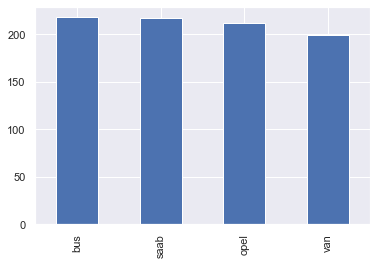

In [9]:
# target attribute value counts
attributes_counts(dataset)

Our dataset is balanced.

### Label encoder for 'Class' attribute

In [8]:

# label encoder for 'Class' attribute
le = LabelEncoder()
dataset['Class'] = le.fit_transform(dataset['Class'])
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0


### Vizualisation of all attributes

In [10]:
# vizualisation of all attributes
one = ['Class', 'ELONGATEDNESS', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCATTER_RATIO', 'PR.AXIS_RECTANGULARITY', 'HOLLOWS_RATIO']
two = ['Class', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'MAX.LENGTH_ASPECT_RATIO', 'CIRCULARITY', 'RADIUS_RATIO', 'SKEWNESS_ABOUT_MINOR']
three = ['Class', 'PR.AXIS_ASPECT_RATIO','KURTOSIS_ABOUT_MINOR','DISTANCE_CIRCULARITY','MAX.LENGTH_RECTANGULARITY','KURTOSIS_ABOUT_MAJOR','COMPACTNESS']

Part one:



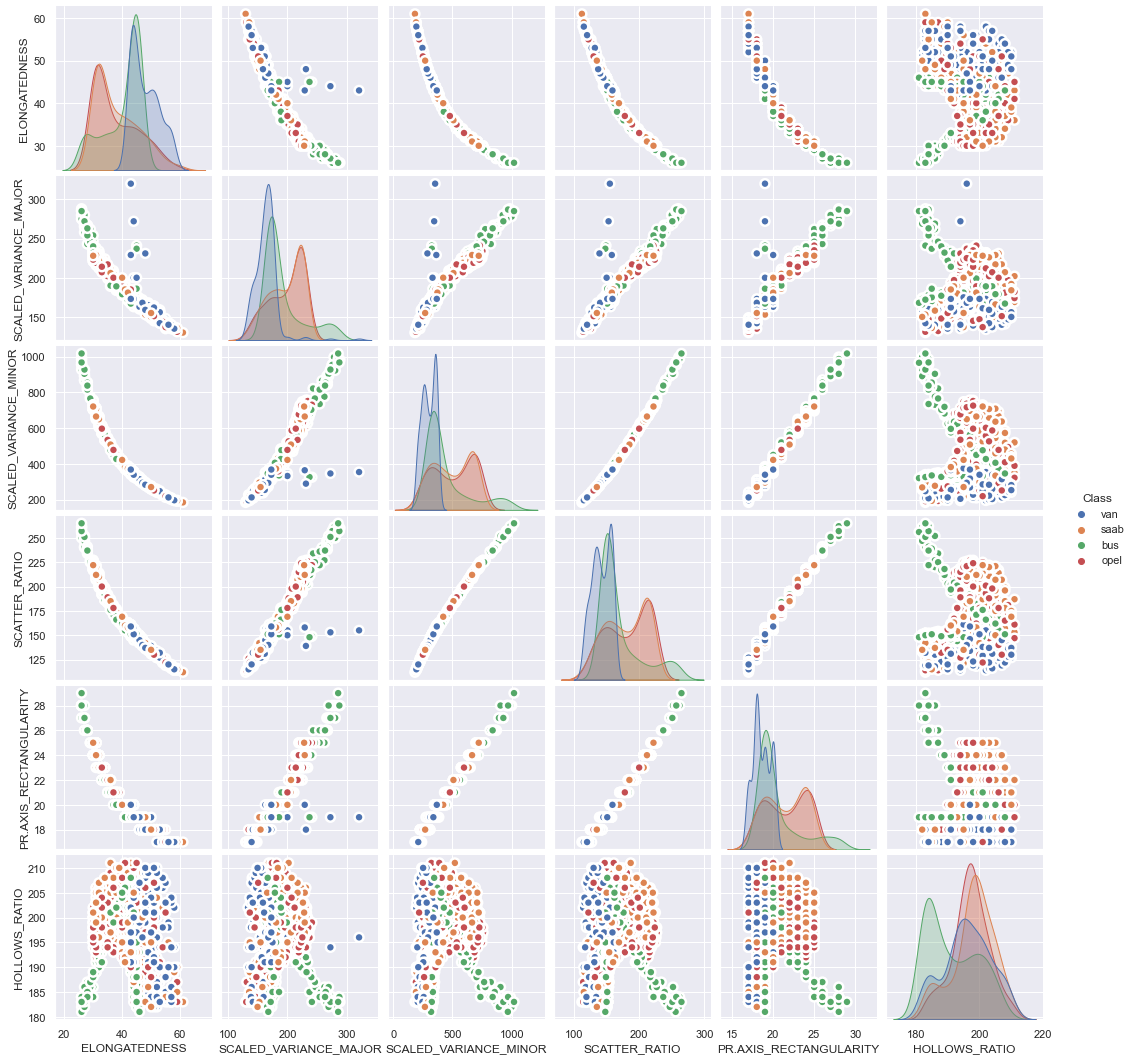



Part two:



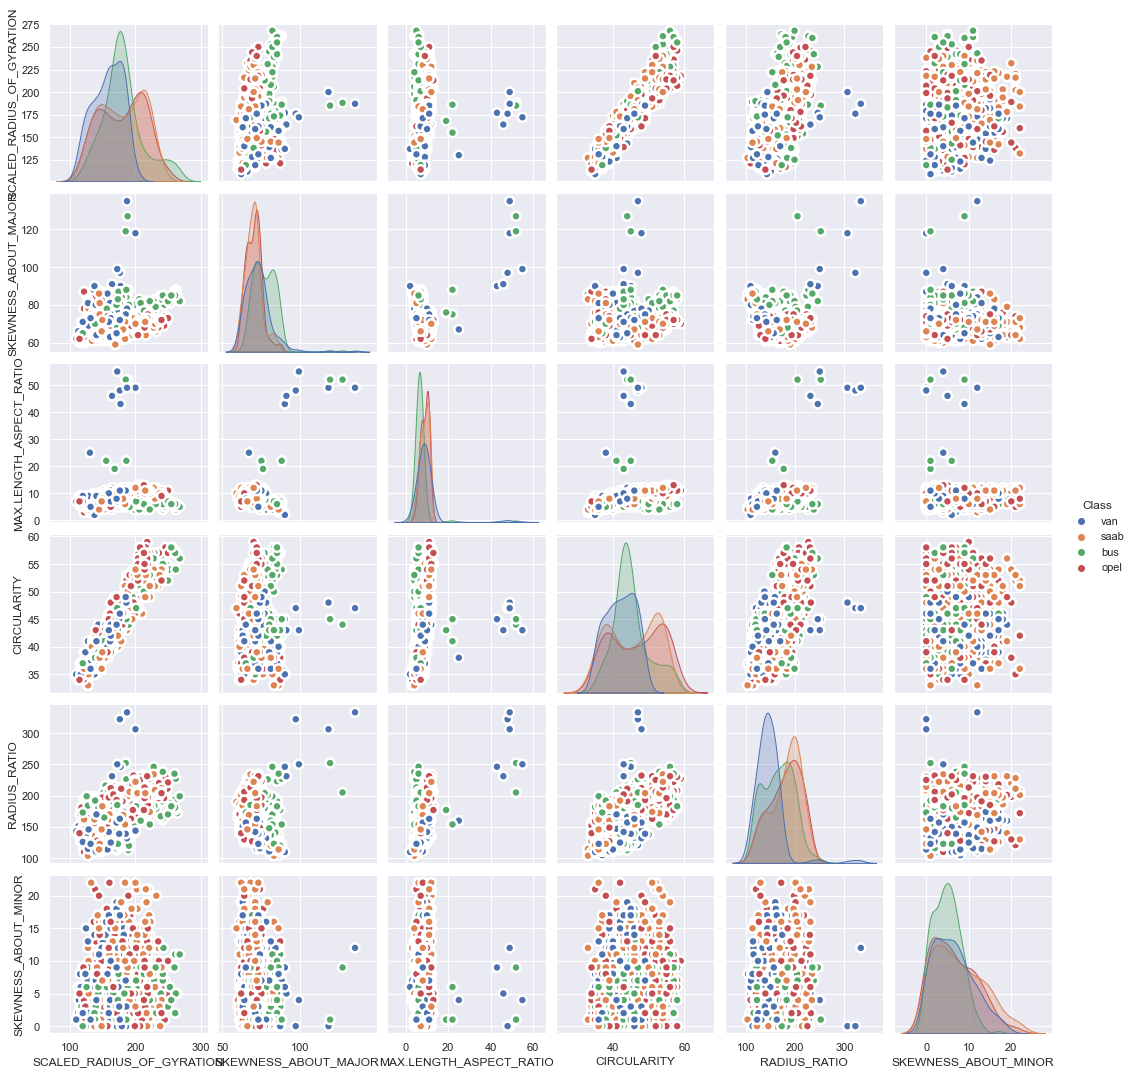



Part three:



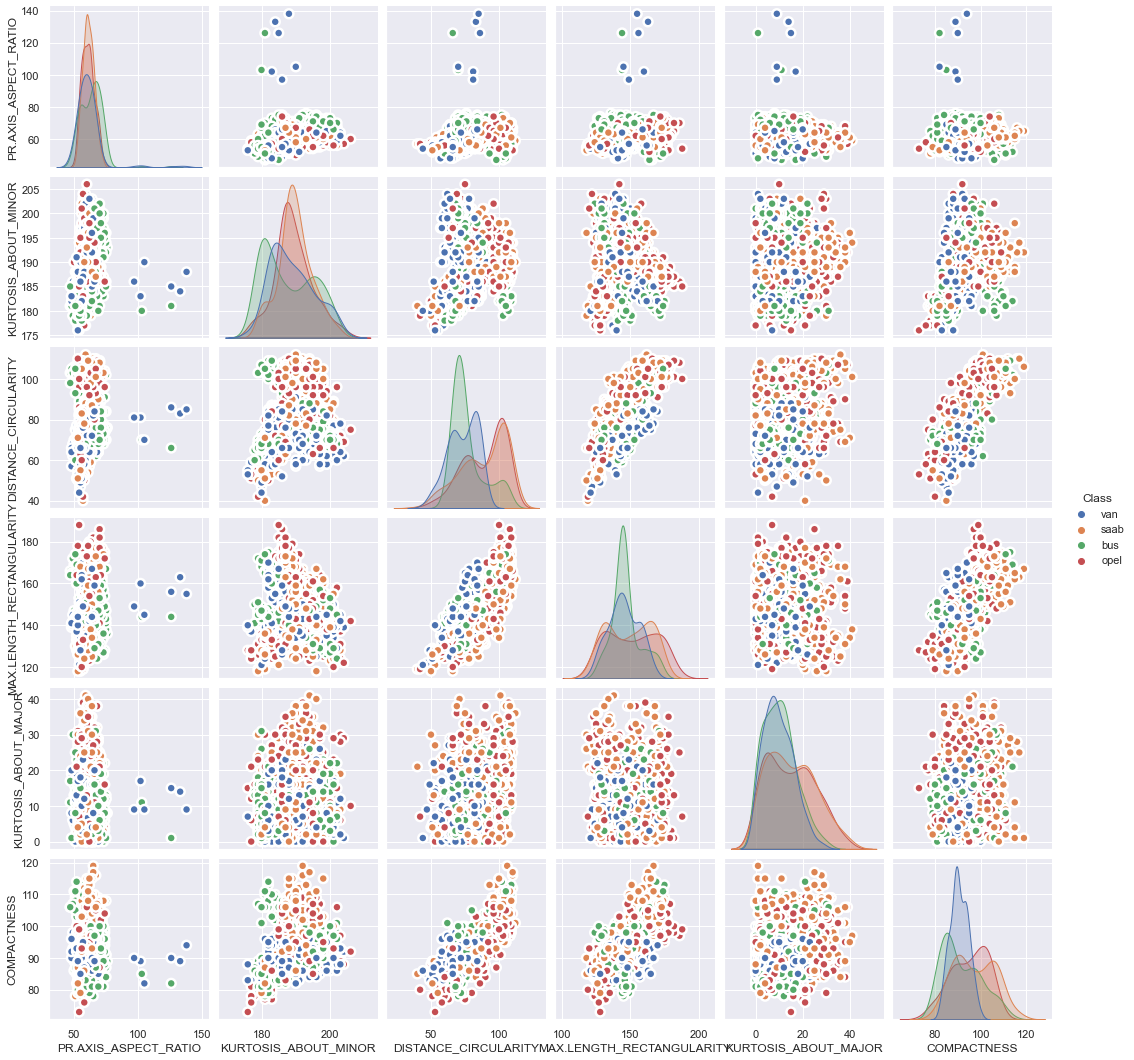

In [11]:
all_attrubutes_vizual(dataset, one, two, three)

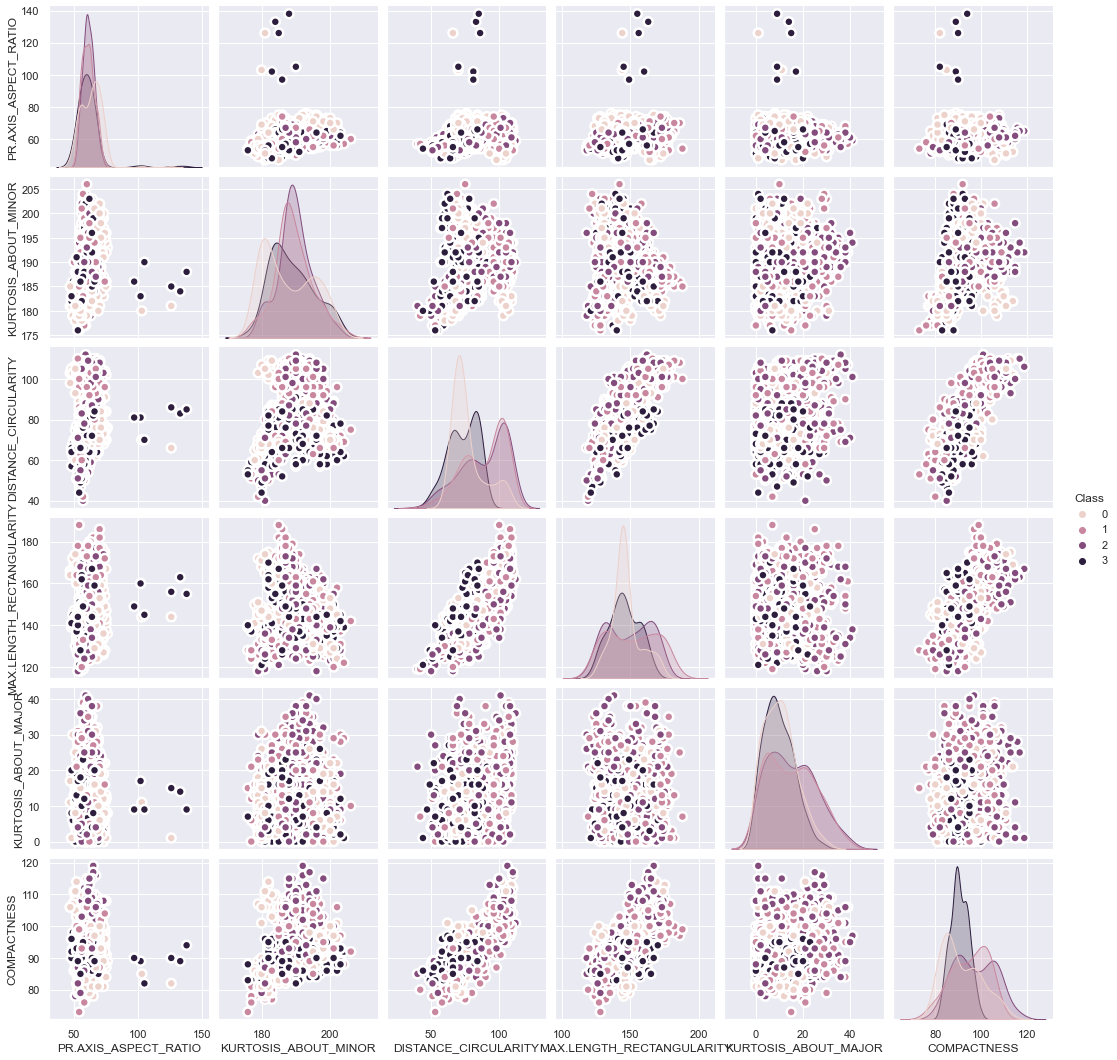

In [11]:
# vizualisation (third part of attributes)
three = ['Class', 'PR.AXIS_ASPECT_RATIO','KURTOSIS_ABOUT_MINOR','DISTANCE_CIRCULARITY','MAX.LENGTH_RECTANGULARITY','KURTOSIS_ABOUT_MAJOR','COMPACTNESS']
df3 = dataset[three]
sns.pairplot(df3, kind="scatter",  hue="Class", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

### Correlation list and plot of each attribute

In [17]:
# correlation list and plot of each attribute
corr_plot_list(dataset)

'Correlation list of each attribute: 


KeyError: 'Class'

### Drop column 'Class'

In [14]:
dataset = dataset.drop(columns=['Class'])

## Part 3: Data Wrangling and Transformation

### StandardScaler

In [15]:
# StandardScaler 
sc = StandardScaler()
dataset_sc = sc.fit_transform(dataset)
dataset_sc = pd.DataFrame(dataset_sc)
dataset_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.160580,0.508950,0.057819,0.270806,1.307291,0.311542,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,-0.329056,-0.076711,0.380991,-0.313722,0.183957
1,-0.325470,-0.626268,0.121261,-0.835244,-0.595396,0.094079,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,-0.061767,0.533610,0.156925,0.010937,0.452977
2,1.254193,0.833298,1.517005,1.197496,0.546217,0.311542,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,0.071877,1.550812,-0.403238,-0.151393,0.049447
3,-0.082445,-0.626268,-0.005624,-0.297166,0.165679,0.094079,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-1.264566,-0.076711,-0.291206,1.634233,1.529056
4,-1.054545,-0.139746,-0.766939,1.077923,5.239511,9.444962,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,7.288670,0.533610,-0.179173,-1.450029,-1.699181


### Creating datasets for ML part

In [16]:
# set 'X' for features' and y' for the target ('Class').
X = dataset_sc.copy()
y = target

### 'Train\Test' split

In [17]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=0)

In [18]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((642, 18), (642,))

In [19]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((204, 18), (204,))

## Part 4: Machine Learning.

### Build, train and evaluate model

SVC model

In [20]:
classifier = SVC(kernel='linear', decision_function_shape='ovo', tol=0.03)
classifier.fit(X_train, y_train)
SVC_pred = classifier.predict(X_test)
accuracy = accuracy_score(SVC_pred, y_test)
print("Accuracy:", accuracy * 100)

Accuracy: 80.88235294117648


### Classification report

In [21]:
print("SVC Classification Report: \n", classification_report(y_test, SVC_pred, digits = 6))

SVC Classification Report: 
               precision    recall  f1-score   support

         bus   0.901961  1.000000  0.948454        46
        opel   0.653061  0.666667  0.659794        48
        saab   0.727273  0.634921  0.677966        63
         van   0.959184  1.000000  0.979167        47

    accuracy                       0.808824       204
   macro avg   0.810370  0.825397  0.816345       204
weighted avg   0.802632  0.808824  0.804077       204



Вывод:

SVC linear model показывает достаточно хорошую метрику accuracy = 80.8% или 80.88235294117648;
Количество примеров классов представленных в тестовом сете данных (204 примера): "bus"=46, "opel"=48, "saab"=63, "van"=47;
По метрике f1-score сразу можно сказать, что лучше всех определился класс "van", за ним класс "bus", далее класс "saab", и хуже всех класс "opel". Давайте проверим это на confusion matrix.

### Confusion matrix

SVC Confusion Matrix


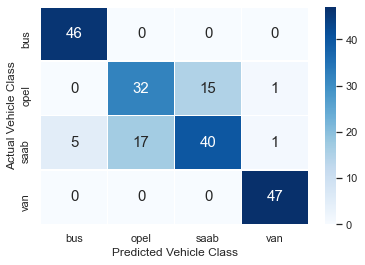

In [22]:

# confusion matrix of SVC model
labels = ["bus", "opel", "saab", "van"]
cm = confusion_matrix(y_test, SVC_pred, labels=None)
print('SVC Confusion Matrix')

# visualisation of matrix
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, fmt="d", cmap = 'Blues', linewidths = 0.5, annot_kws = {'size': 15})
plt.ylabel("Actual Vehicle Class")
plt.xlabel("Predicted Vehicle Class")    
plt.show()

### Misclassification plot

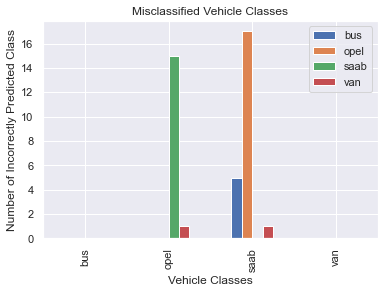

In [23]:

# misclassification vehicle plot 
for label in df_cm.columns:
    df_cm.at[label, label] = 0
    
ax = df_cm.plot(kind="bar", title="Misclassified Vehicle Classes")
ax.set_xlabel("Vehicle Classes")
ax.set_ylabel("Number of Incorrectly Predicted Class")    
plt.show()

класс "van": верно определен 47 раз из 47 примеров; неверно определен в других классах 2 раза, другие классы неверно определены в данном классе 0 раз.
класс "bus": верно определен 46 раз из 46 примеров; неверно определен в других классах 5 раз, другие классы неверно определены в данном классе 0 раз.
класс "saab": верно определен 40 раз из 63 примеров; неверно определен в других классах 15 раз, другие классы неверно определены в данном классе 23 раз.
класс "opel": верно определен 32 раза из 48 примеров; неверно определен в других классах 17 раз, другие классы неверно определены в данном классе 16 раз.

### Comparison table between Actual 'Class' and Predicted 'Class'

In [26]:
# comparison table between Actual 'Class' and Predicted 'Class'
actualvspredicted = pd.DataFrame({"Actual Vehicle Class":y_test,"SVC Predicted Vehicle Class":SVC_pred})
actualvspredicted.head(10)

,Actual Vehicle Class,SVC Predicted Vehicle Class
506,saab,opel
222,bus,bus
612,opel,van
730,opel,opel
661,saab,saab
577,opel,saab
31,saab,van
145,opel,opel
794,bus,bus
416,bus,bus


## Conclusion.

In [25]:
# submission of .csv file with test predictions
sub = pd.DataFrame()
sub['ID'] = X_test.index
sub['Class'] = SVC_pred
sub.to_csv('VehiclesPredictionsTest.csv', index=False)

Question: Определите класс транспортного средства по набору данных, описывающих геометрические особенности силуэтов транспортных средств, полученных по фотографиям для распознавания изображений (use multi-class classification; check balance of classes; calculate perdictions).

Multi-class classification was applied.

Classes were balanced in our dataset.

SVC model was used for ML process.

Result:

Train/Test split: test_size=0.24, random_state=0;

SVC linear model показывает достаточно хорошую метрику accuracy = 80.8% или 80.88235294117648;

Сonfusion matrix показывает, что из 204 примеров тестовых данных были верно определены 165 примеров и неверно определены 39 примеров;

Сonfusion matrix так же показывает, что самыми хорошо определяемыми классами являются "van" и "bus", а самыми трудно определяемыми "saab" и "opel".